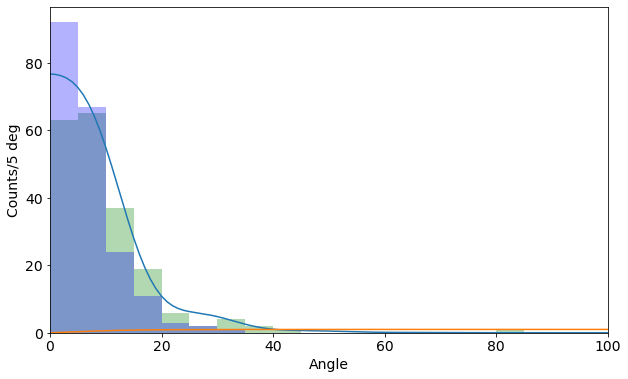

In [74]:
# Reads probability distribution from file and return a list of random numbers based on the distribution

import pandas as pd
import matplotlib.pyplot as plt
import random


def randomPDF(n = 1, fileName = "DataSets/test1.csv"):      # returns random numbers list of length n  
                                                            # with pdf given in fileName
    dis = pd.read_csv(fileName, header = None)           # Reads probability distribution
    cdf = [sum(dis[1][:i]) for i in range(len(dis))]     # Obtainining CDF
    cdf = [num/cdf[-1] for num in cdf]                   # Normalizing CDF

    pdf = list()
    for i in range(n):
        rnd = random.random()
        i = 0
        while rnd > cdf[i]:
            i = i + 1
        f = (cdf[i]-rnd)/(cdf[i]-cdf[i-1])
        pdf.append( dis[0][i-1]+f )
    return (pdf)

plt.figure(figsize=(10,6))
plt.rc('font', size = 14) 
plt.plot(dis[0], 25*dis[1])
plt.plot(dis[0], cdf)
kwargs = dict(alpha = 0.3, bins = [5*i for i in range(36)])
plt.hist(randomPDF(200, "DataSets/test1.csv"), **kwargs, color='g')
plt.hist(randomPDF(200, "DataSets/test2.csv"), **kwargs, color='b')
plt.xlabel('Angle')
plt.ylabel('Counts/5 deg')
plt.xlim([0,100])
plt.show()

In [28]:
dis[0][3]

3